In [1]:
import pandas as pd
import alpaca_trade_api as tradeapi
import requests
from dotenv import load_dotenv
import os
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
load_dotenv("DLC.env")

True

In [3]:
API_KEY = os.getenv("ALPACA_API_KEY")
API_SECRET = os.getenv("ALPACA_SECRET_KEY")

In [4]:
alpaca = tradeapi.REST(
    API_KEY,
    API_SECRET,
    api_version="v2")

In [5]:
tickers = ["FB", "TWTR"]

In [6]:
# As an investor the user provides us with 5 assets they want to invest in

# STEP 1 - show the investor the risk assessment of investing in these assets
# retrieve data set
# calculate percent change (daily returns)
# 1st visualization - plot daily returns, possibly plot correlatiob of assets as well
# calculate std from daily returns 
# calculate annualized std then rank assets in terms of riskiness
# calculate sharp ratios 
# 2nd visualization - plot annualized standard deviations and sharp ratios

# STEP 2 - create sample portfolios
# create 3 porfolios based on risk appetite
# 1st -> highest std , 5th -> lowest std
# $10000 investment 
# low risk portfolio - [1st - 5%, 2nd - 10%, 3rd - 15%, 4th- 20%, 5th - 50%] -- 80% investment , 20% lending
# medium risk portfolio - [1st - 10%, 2nd - 15%, 3rd - 20%, 4th- 25%, 5th - 30%] -- 60% investment , 40% lending
# high risk portfolio - [1st - 30%, 2nd - 25%, 3rd -20%, 4th- 15%, 5th - 10%] -- 50% investment , 50% lending
# ex. weights = [.05, .1, .15, .2, .5] --> daily_returns.dot(weights)

# STEP 3 - calculate cumulative returns from each portfolio
# calculate returns for each risk scenario using different weights
# calculate cumulative returns for each scenario
# show and calculate monte carlo simulation
# 3rd visualization - plot cumulative returns



In [7]:
tickers = input('what do you want to invest in?').split()

what do you want to invest in? AAPL TWTR AMZN F TSLA


In [8]:
capital = input('how much do you have to invest?')

how much do you have to invest? 100000


In [9]:
start = pd.Timestamp("2019-07-14", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()
timeframe = "1D"

In [10]:
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df

In [11]:
df_portfolio.head()

AAPL                                      \
                             open      high     low   close    volume   
time                                                                    
2019-07-15 00:00:00-04:00  204.09  205.8700  204.00  205.20  14419116   
2019-07-16 00:00:00-04:00  204.59  206.1100  203.50  204.49  14501634   
2019-07-17 00:00:00-04:00  204.05  205.0915  203.27  203.28  11652445   
2019-07-18 00:00:00-04:00  204.00  205.8800  203.70  205.66  15375748   
2019-07-19 00:00:00-04:00  205.79  206.5000  202.36  202.57  18834365   

                              AMZN                                          \
                              open       high        low    close   volume   
time                                                                         
2019-07-15 00:00:00-04:00  2021.40  2022.9000  2001.5500  2021.00  2598695   
2019-07-16 00:00:00-04:00  2010.58  2026.3196  2001.2200  2010.00  2356968   
2019-07-17 00:00:00-04:00  2007.05  2012.0000  1992.1200  1992.16  2257978   
2019-07-18 00:00:00-04:00  1980.01  1987.5000  1951.5500  1978.67  3163219   
2019-07-19 00:00:00-04:00  1991.02  1996.0000  1962.2255  1965.00  2898302   

                           ...    TSLA                                        \
                           ...    open    high       low     close    volume   
time                       ...                                                 
2019-07-15 00:00:00-04:00  ...  248.00  254.42  244.8600  253.4800  10516336   
2019-07-16 00:00:00-04:00  ...  249.30  253.53  247.9325  252.4000   7718769   
2019-07-17 00:00:00-04:00  ...  255.60  258.31  253.3500  254.8300   9338786   
2019-07-18 00:00:00-04:00  ...  255.05  255.75  251.8850  253.5900   4502229   
2019-07-19 00:00:00-04:00  ...  255.69  259.96  254.6200  258.0789   6785285   

                            TWTR                                      
                            open    high      low    close    volume  
time                                                                  
2019-07-15 00:00:00-04:00  38.00  38.970  37.9435  38.6900  11258081  
2019-07-16 00:00:00-04:00  38.78  38.790  37.8200  38.0100   9311635  
2019-07-17 00:00:00-04:00  37.86  38.230  37.5600  37.7087   7147682  
2019-07-18 00:00:00-04:00  37.39  37.795  37.0000  37.6800   9449129  
2019-07-19 00:00:00-04:00  37.96  38.090  36.7300  36.7700   9134941  

[5 rows x 25 columns]

In [12]:
df_closing = pd.DataFrame()

In [13]:
type(df_closing)

pandas.core.frame.DataFrame

In [14]:
for ticker in tickers:
    df_closing[ticker] = df_portfolio[ticker]['close']

In [15]:
df_closing

,AAPL,TWTR,AMZN,F,TSLA
time,,,,,
2019-07-15 00:00:00-04:00,205.2000,38.6900,2021.00,10.420,253.4800
2019-07-16 00:00:00-04:00,204.4900,38.0100,2010.00,10.510,252.4000
2019-07-17 00:00:00-04:00,203.2800,37.7087,1992.16,10.330,254.8300
2019-07-18 00:00:00-04:00,205.6600,37.6800,1978.67,10.265,253.5900
2019-07-19 00:00:00-04:00,202.5700,36.7700,1965.00,10.200,258.0789
...,...,...,...,...,...
2020-07-08 00:00:00-04:00,381.4400,35.4000,3081.88,6.100,1365.8054
2020-07-09 00:00:00-04:00,382.6599,35.7300,3183.81,5.850,1393.8100
2020-07-10 00:00:00-04:00,383.5200,35.3900,3203.36,6.100,1546.0100


In [16]:
# STEP 1 - show the investor the risk assessment of investing in these assets
# retrieve data set
# calculate percent change (daily returns)
# 1st visualization - plot daily returns, possibly plot correlatiob of assets as well
# calculate std from daily returns 
# calculate annualized std then rank assets in terms of riskiness
# calculate sharp ratios 
# 2nd visualization - plot annualized standard deviations and sharp ratios

daily_returns = df_closing.pct_change().dropna()
daily_returns.head()

,AAPL,TWTR,AMZN,F,TSLA
time,,,,,
2019-07-16 00:00:00-04:00,-0.003460,-0.017576,-0.005443,0.008637,-0.004261
2019-07-17 00:00:00-04:00,-0.005917,-0.007927,-0.008876,-0.017127,0.009628
2019-07-18 00:00:00-04:00,0.011708,-0.000761,-0.006772,-0.006292,-0.004866
2019-07-19 00:00:00-04:00,-0.015025,-0.024151,-0.006909,-0.006332,0.017701
2019-07-22 00:00:00-04:00,0.022955,0.022029,0.010646,-0.017647,-0.009411


<AxesSubplot:xlabel='time'>

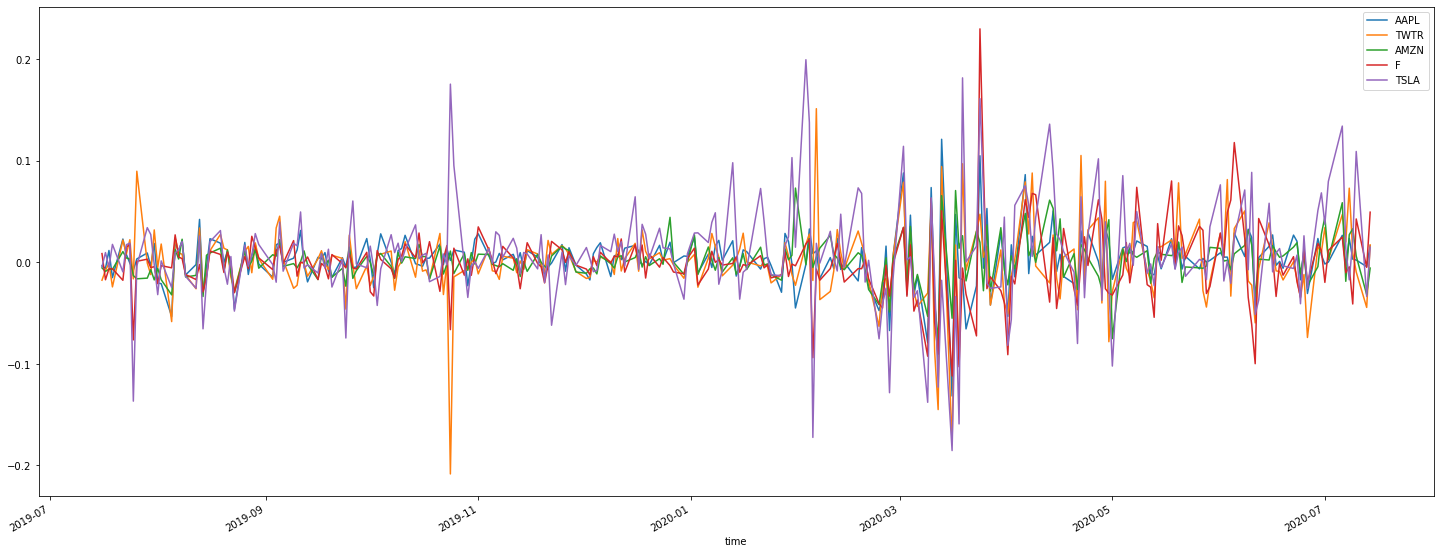

In [17]:
daily_returns.plot.line(figsize=(25,10))

<AxesSubplot:>

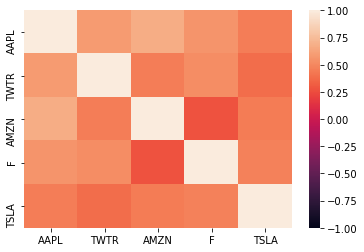

In [18]:
correlations = daily_returns.corr()
sns.heatmap(correlations, vmin=-1, vmax=1)

In [19]:
std_deviations = daily_returns.std()
annualized_std = (std_deviations * np.sqrt(252)).sort_values(ascending=False)
annualized_std

TSLA    0.794331
TWTR    0.587912
F       0.539043
AAPL    0.409566
AMZN    0.325055
dtype: float64

<AxesSubplot:>

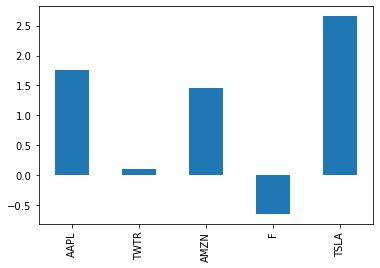

In [20]:
sharpe_ratios = ((daily_returns.mean() * 252)) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

In [21]:
# low risk portfolio - [1st - 5%, 2nd - 10%, 3rd - 15%, 4th- 20%, 5th - 50%] -- 80% investment , 20% lending
# medium risk portfolio - [1st - 10%, 2nd - 15%, 3rd - 20%, 4th- 25%, 5th - 30%] -- 60% investment , 40% lending
# high risk portfolio - [1st - 30%, 2nd - 25%, 3rd -20%, 4th- 15%, 5th - 10%] -- 50% investment , 50% lending
# ex. weights = [.05, .1, .15, .2, .5] --> daily_returns.dot(weights)


low_risk_weights = [.05, .1, .15, .2, .5]
med_risk_weights = [.1, .15, .2, .25, .3]
high_risk_weights = [.3, .25, .2, .15, .1]
volatitly_ranks = annualized_std.index.to_list()
print(volatitly_ranks)
ordered_volatility_df = pd.concat([daily_returns[volatitly_ranks[0]], daily_returns[volatitly_ranks[1]],daily_returns[volatitly_ranks[2]],daily_returns[volatitly_ranks[3]],daily_returns[volatitly_ranks[4]]], axis=1, join='inner')
low_risk_porfolio = ordered_volatility_df.dot(low_risk_weights)
med_risk_porfolio = ordered_volatility_df.dot(med_risk_weights)
high_risk_porfolio = ordered_volatility_df.dot(high_risk_weights)

['TSLA', 'TWTR', 'F', 'AAPL', 'AMZN']


<AxesSubplot:xlabel='time'>

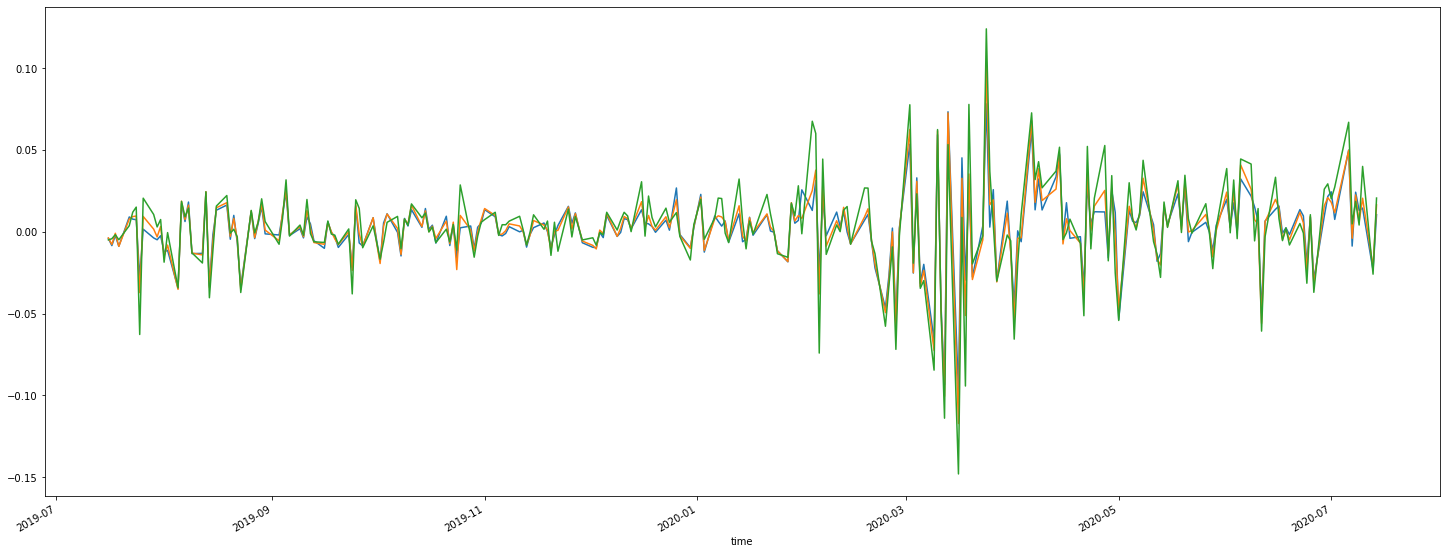

In [30]:
ax = low_risk_porfolio.plot.line(figsize=(25,10))
med_risk_porfolio.plot.line(ax=ax)
high_risk_porfolio.plot.line(ax=ax)

<AxesSubplot:xlabel='time'>

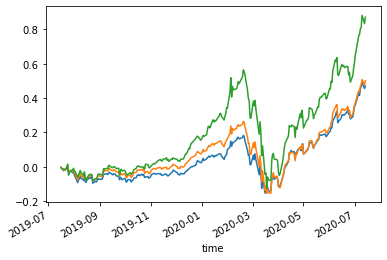

In [35]:
# STEP 3 - calculate cumulative returns from each portfolio
# calculate returns for each risk scenario using different weights
# calculate cumulative returns for each scenario
# show and calculate monte carlo simulation
# 3rd visualization - plot cumulative returns

low_risk_cumulative_returns = (1 + low_risk_porfolio).cumprod() - 1
med_risk_cumulative_returns = (1 + med_risk_porfolio).cumprod() - 1
high_risk_cumulative_returns = (1 + high_risk_porfolio).cumprod() - 1
ax = low_risk_cumulative_returns.plot()
med_risk_cumulative_returns.plot(ax=ax)
high_risk_cumulative_returns.plot(ax=ax)

In [36]:
# Monte Carlo Simulation



,open,high,low,close,volume,open,high,low,close,volume,...,open,high,low,close,volume,open,high,low,close,volume
time,,,,,,,,,,,,,,,,,,,,,
2019-07-15 00:00:00-04:00,248.00,254.42,244.8600,253.4800,10516336,38.00,38.970,37.9435,38.6900,11258081,...,204.09,205.8700,204.00,205.20,14419116,2021.40,2022.9000,2001.5500,2021.00,2598695
2019-07-16 00:00:00-04:00,249.30,253.53,247.9325,252.4000,7718769,38.78,38.790,37.8200,38.0100,9311635,...,204.59,206.1100,203.50,204.49,14501634,2010.58,2026.3196,2001.2200,2010.00,2356968
2019-07-17 00:00:00-04:00,255.60,258.31,253.3500,254.8300,9338786,37.86,38.230,37.5600,37.7087,7147682,...,204.05,205.0915,203.27,203.28,11652445,2007.05,2012.0000,1992.1200,1992.16,2257978
2019-07-18 00:00:00-04:00,255.05,255.75,251.8850,253.5900,4502229,37.39,37.795,37.0000,37.6800,9449129,...,204.00,205.8800,203.70,205.66,15375748,1980.01,1987.5000,1951.5500,1978.67,3163219
2019-07-19 00:00:00-04:00,255.69,259.96,254.6200,258.0789,6785285,37.96,38.090,36.7300,36.7700,9134941,...,205.79,206.5000,202.36,202.57,18834365,1991.02,1996.0000,1962.2255,1965.00,2898302
